# Instructions
1. Use intrasm_engine/benchmark/setup_sgk_dlmc.sh [SGK deep learning matrix collection](https://storage.googleapis.com/sgk-sc2020/dlmc.tar.gz) to set up the data at intrasm_engine/data/sgk_dlmc/dlmc
2. Use intrasm_engine/benchmark/utils.py \_\_main\_\_ to convert DLMC SMTX files to MTX files.

Use intrasm_engine/benchmark/setup_sksparse_data.sh [SKSparse test data](https://github.com/scikit-sparse/scikit-sparse) to set up the data at intrasm_engine/data/sksparse

# Configurations

In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import IPython
# Get notebook path. This only works in vscode Jupyter notebooks.
notebook_path = "/home/" + "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/")[-5:]
    )
sgk_data_path = os.path.join(os.path.dirname(os.path.dirname(notebook_path)),'data','sgk_dlmc')
print(sgk_data_path)

/home/kwu/cupy-playground/intrasm_engine/data/sgk_dlmc


In [2]:
import intrasm_engine

Print handle to force cublas initialization (otherwise first matmul captured in the graph may fail): 152905360
Setting float16 and bf16 using reduced precision in reduction


# Bandwidth Reducing Examples
Another candidate is [nxmetis](https://networkx-metis.readthedocs.io/en/latest/reference/generated/nxmetis.node_nested_dissection.html) works on networkx graph. For simplicity we didn't implement an example here.

## `scipy` Reverse Cuthill Mckee 

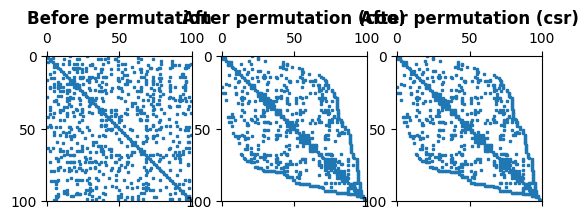

In [3]:
from benchmark import bandwidth_reducing_examples
bandwidth_reducing_examples.reverse_chthill_mckee_example()

## `sksparse` Cholmod

/home/kwu/cupy-playground/intrasm_engine/benchmark/bandwidth_reducing_examples.py:116: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  answer = np.linalg.lstsq(X.todense(), y)[0]
/home/kwu/cupy-playground/intrasm_engine/benchmark/bandwidth_reducing_examples.py:124: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky_AAt(X.T, mode=mode)


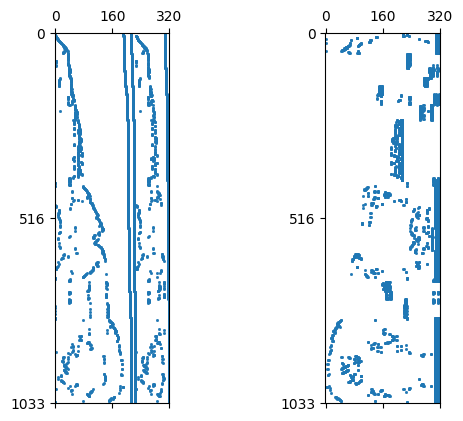

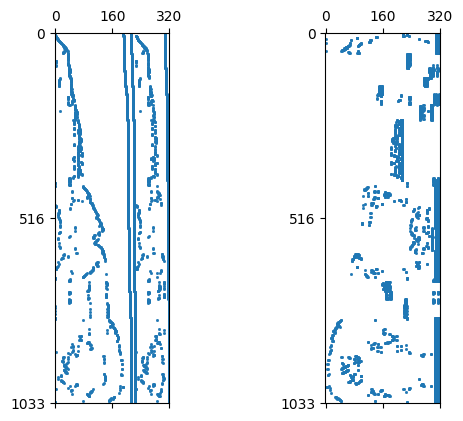

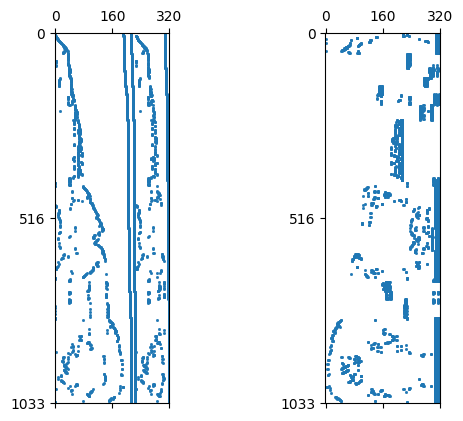

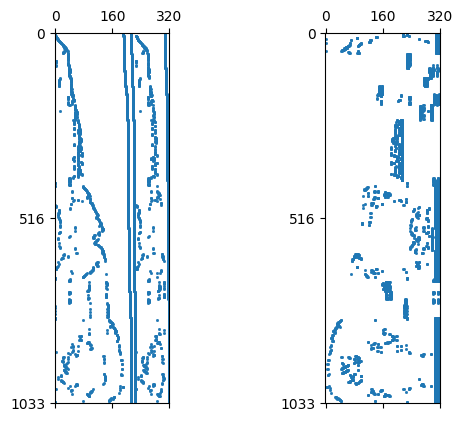

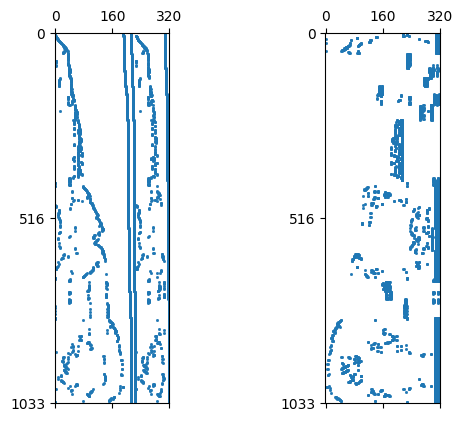

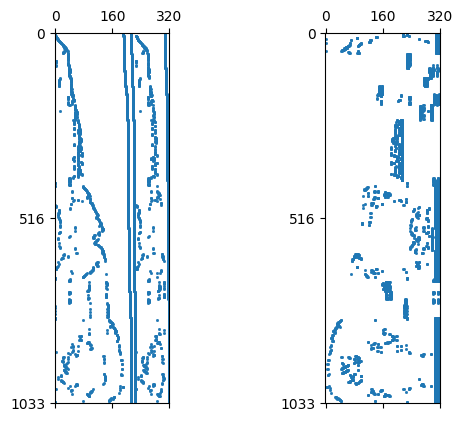

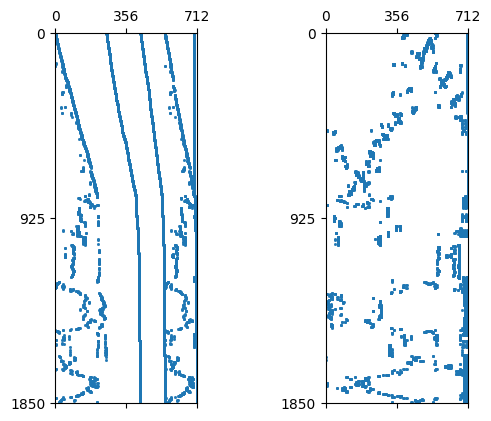

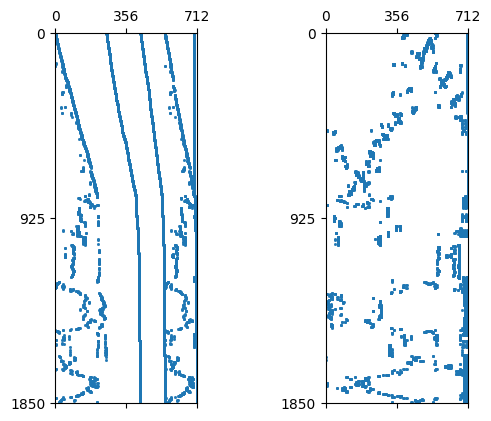

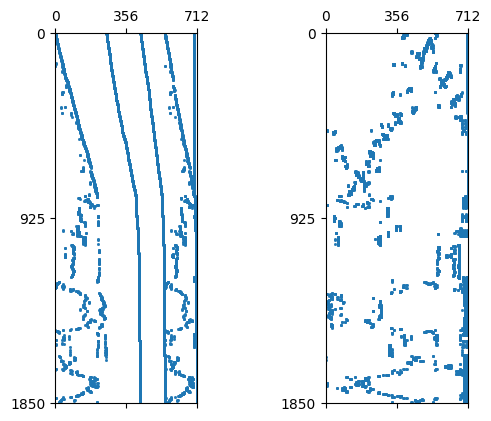

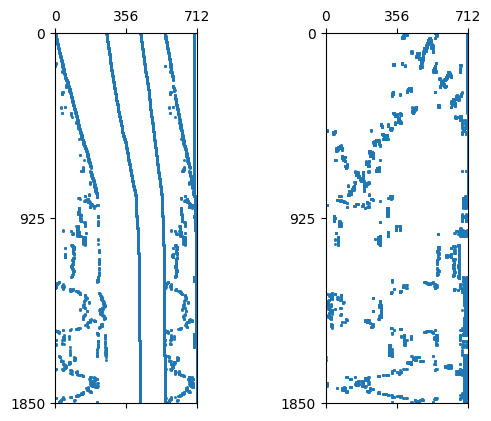

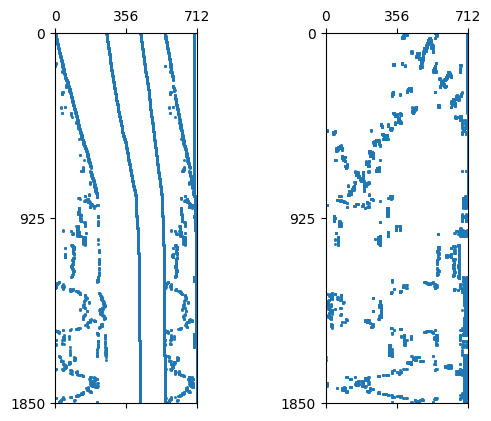

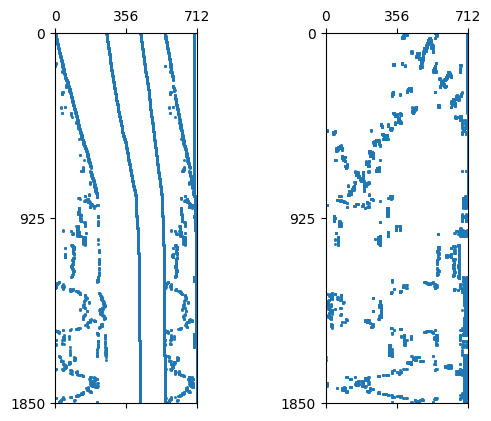

In [4]:
from benchmark import bandwidth_reducing_examples
bandwidth_reducing_examples.test_cholesky_matrix_market()

# Apply Bandwidth reducing permutation to SGK

In [ ]:
print(sgk_data_path)
for root, dirs, files in os.walk(sgk_data_path):
    print(root, dirs, files)
    for file in files:
        if file.endswith(".mtx"):
            print(os.path.join(root, file))
            # Scipy load mtx 
            mat = scipy.io.mmread(os.path.join(root, file))
            mat_rcm = bandwidth_reducing_examples.apply_reverse_chthill_mckee(mat)
            fig = plt.figure()
            ax1 = fig.add_subplot(1, 2, 1)
            ax1.spy(mat,markersize=1.0)
            # ax1.set_xticks([0, mat.shape[1]/2, mat.shape[1]])
            # ax1.set_yticks([0, mat.shape[0]/2, mat.shape[0]])
            ax2 = fig.add_subplot(1, 2, 2)
            ax2.spy(mat_rcm,markersize=1.0)
            # ax2.set_xticks([0, mat.shape[1]/2, mat.shape[1]])
            # ax2.set_yticks([0, mat.shape[0]/2, mat.shape[0]])
            plt.show()